In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import torch
import torch.nn as nn

In [ ]:
def load_data():
  X =np.load('data2D.npy')
  valid_batch = int(len(X) / 4.0)
  np.random.seed(45689)
  rnd_idx = np.arange(len(X))
  np.random.shuffle(rnd_idx)
  val_data = X[rnd_idx[:valid_batch]]
  train_data = X[rnd_idx[valid_batch:]]

  return train_data, val_data

In [ ]:
def train_kmean_torch(train_data, k = 5, lr=0.1, epoch=150):
  #Define a cluster
  m = torch.rand((k, train_data.shape[1]), requires_grad=True)

  #Convert training data to a torch tensor
  X_train = torch.from_numpy(train_data)

  #TODO: define the Adam Optimizer - Done
  optimizer = torch.optim.Adam([m], lr=lr)

  for epoch in range(epoch):
    list_mse = []
    for i in range(k):
      #TODO: fill in the append function  - Done
      list_mse.append(torch.sum((X_train - m[i]) ** 2, dim = 1))

    #TODO: calculate the loss function. Complete the
    #below 3 lines.
    list_mse_torch = torch.stack(list_mse, dim=-1) #Stacks the list_mse[i]
    list_mse_torch_min,_ = torch.min(list_mse_torch, dim=1) #Calculate the min
    L_train = torch.mean(list_mse_torch_min) #Calculate the mean loss

    #Update the model using optimizer and L_train
    optimizer.zero_grad()
    L_train.backward()
    optimizer.step()

  L_train = L_train.detach().numpy()
  m = m.detach().numpy()

  return L_train, m

In [1]:
def evaluate(test_data, m):
  # TODO: complete this function.
  cluster_num = len(m)
  list_mse = []

  for i in range(cluster_num):

    list_mse.append(np.linalg.norm(test_data - m[i], axis=-1) ** 2)

  list_mse_numpy = np.stack(list_mse, -1)
  list_mse_numpy_min = np.min(list_mse_numpy, 1)

  return np.mean(list_mse_numpy_min)


In [ ]:
def get_association(test_data, m):
  #This function returns the list of cluster associated for
  # each data points.
  num_cluster = len(m)
  N, d = test_data.shape
  L_k = np.zeros((N, num_cluster))

  for k in range(num_cluster):
    #TODO: calculate the distance per cluster
    #by fill in the blank
    L_k[:,k] = np.sum((test_data - m[k]) ** 2, axis = 1)

  #Assign to the nearest cluster.
  index = np.argmin(L_k, axis = -1)
  index = index.reshape(len(index), 1)
  return index

In [ ]:
def test_pytorch(train_data, test_data, k=5):
  L,m = train_kmean_torch(train_data, k)
  index = get_association(test_data, m)
  new_X = np.concatenate((test_data, index), axis = 1)

  print ("PyTorch test score:", evaluate(test_data, m))
  color_list = ['g', 'b', 'm', 'y', 'c']

  for i in range(len(m)):
    tmp = new_X[new_X[...,-1] == i]
    plt.scatter(tmp[:,0], tmp[:,1], c=color_list[i])
  plt.show() # keep the plot

In [ ]:
def test_sckitlearn(train_data, test_data, k=5):
  #TODO: Create the KMeans object and fit the model using train_data - Done
  # Use k cluster, 5000 maximum iterations and "auto" algorithm.
  # Fill in the line below.
  kmeans = KMeans(n_clusters=k, max_iter=5000, n_init="auto")
  kmeans.fit(train_data)
  #Association and visualization step
  index = kmeans.predict(test_data)
  index = index.reshape(len(index), 1)
  new_X = np.concatenate((test_data, index), axis = 1)

  color_list = ['g', 'b', 'm', 'y', 'c']
  print ("Scikit-learn test score:", evaluate(test_data, kmeans.cluster_centers_))
  for i in range(len(kmeans.cluster_centers_)):
    tmp = new_X[new_X[...,-1] == i]
    plt.scatter(tmp[:,0], tmp[:,1], c=color_list[i])
  plt.show() # keep the plot

k = 1
PyTorch test score: 3.8862491496051663


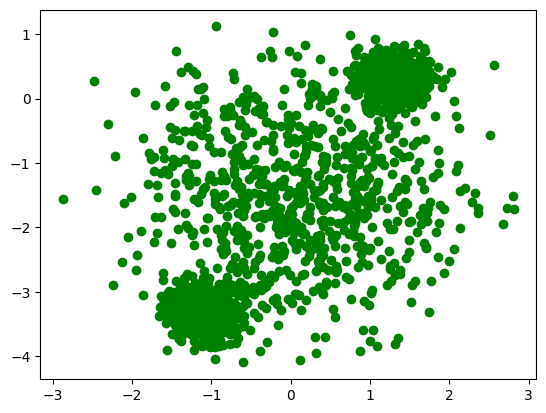

Scikit-learn test score: 3.8862500723240965


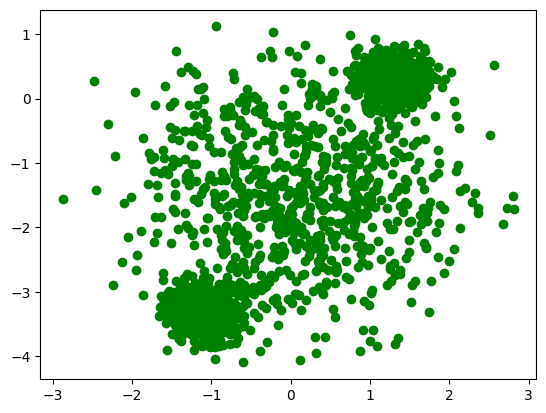

k = 2
PyTorch test score: 0.8750401833973223


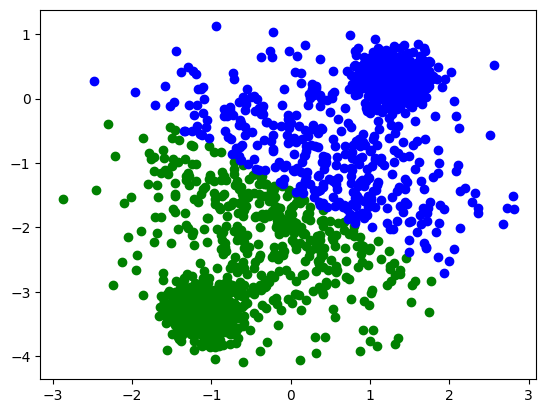

Scikit-learn test score: 0.8750131808478715


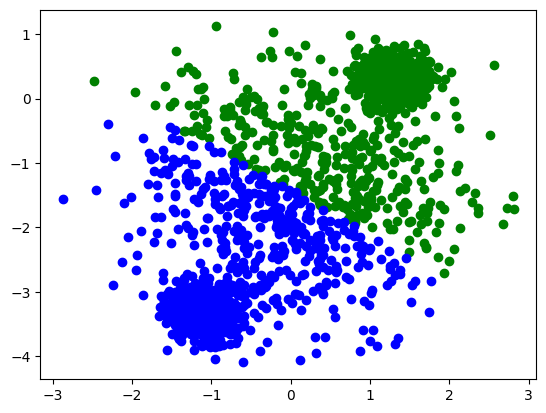

k = 3
PyTorch test score: 0.48848859870183897


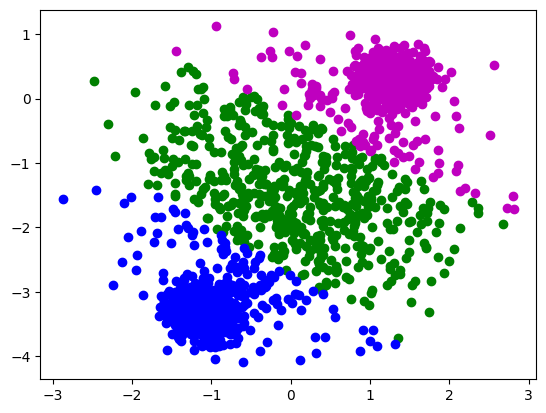

Scikit-learn test score: 0.48919396378942703


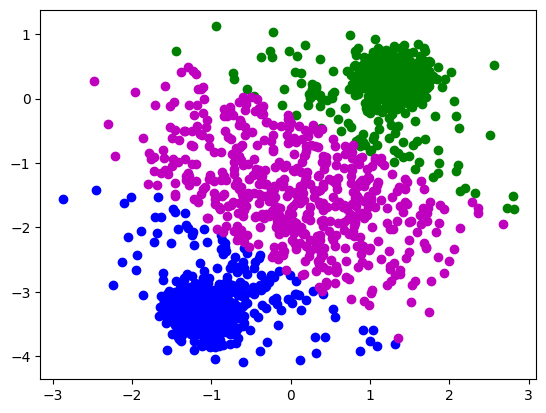

k = 4
PyTorch test score: 0.3151330003799376


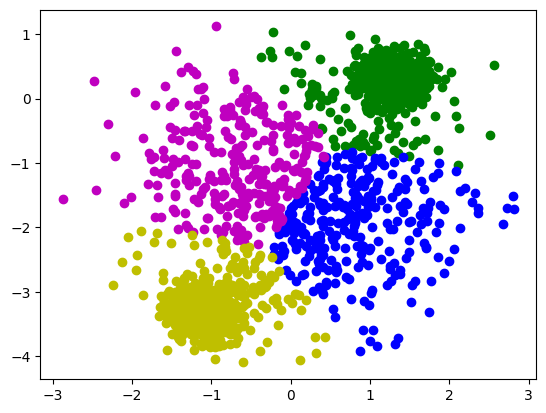

Scikit-learn test score: 0.3153616015230923


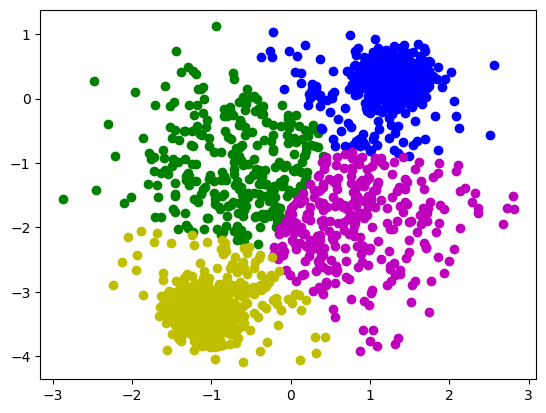

k = 5
PyTorch test score: 0.2643235469306897


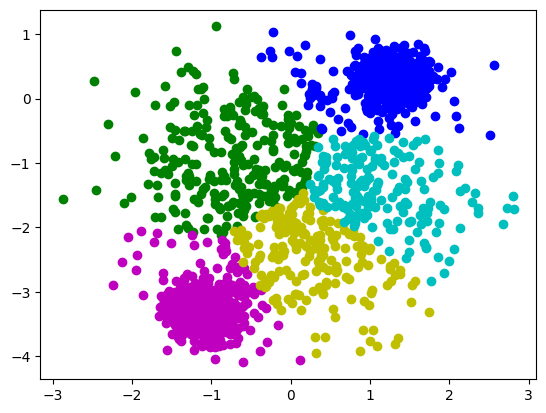

Scikit-learn test score: 0.2687197945006495


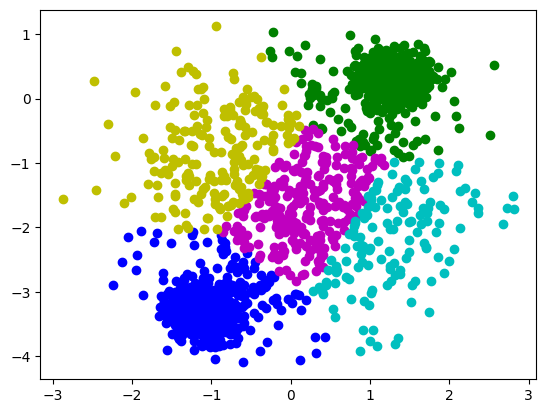

In [ ]:
train_data, test_data = load_data()
#write code to generate all number of k = 1,2,3,4,5
for i in range (1,6):
  print("k = "+ str(i))
  test_pytorch(train_data, test_data, k=i)
  test_sckitlearn(train_data, test_data, k=i)


PyTorch test score: 0.27274729136032977


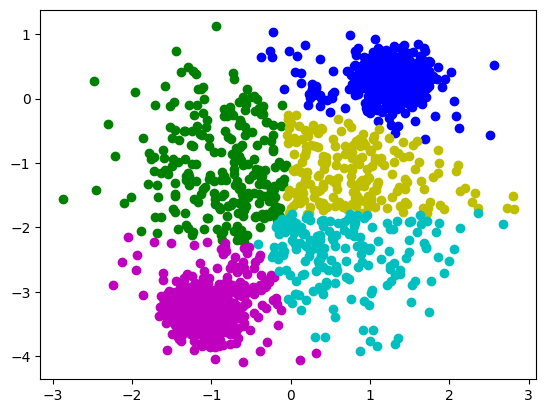

PyTorch test score: 0.26435186038545755


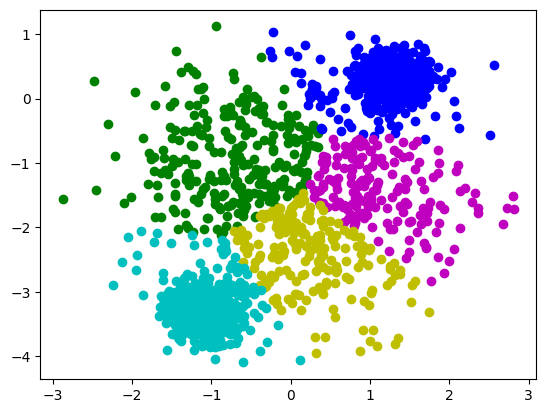

In [ ]:
test_pytorch(train_data, test_data, k=5)
test_pytorch(train_data, test_data, k=5)